<a href="https://colab.research.google.com/github/hoashalarajh/python-code/blob/main/Separable_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seperable Convolutional Neural Networks - Example

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import cv2
from tensorflow.keras import datasets, layers, models

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print (x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# preparing the data

x_train = x_train / 255

x_test = x_test / 255

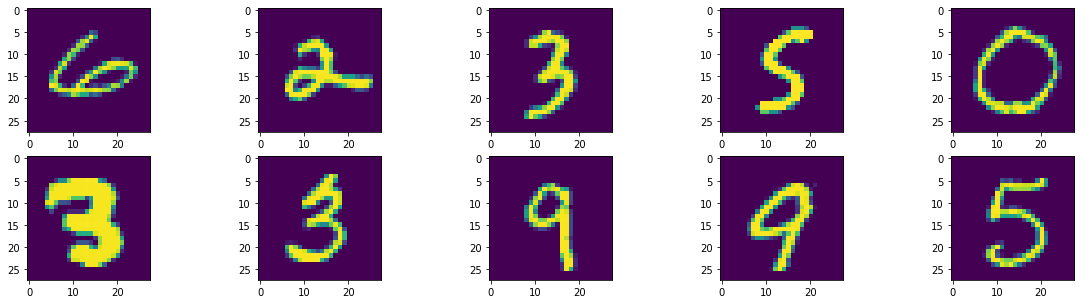

In [5]:
# random image plotting from training set

plt.figure(figsize=(20,5))

for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(x_train[random.randint(1,60000)].reshape(28,28))


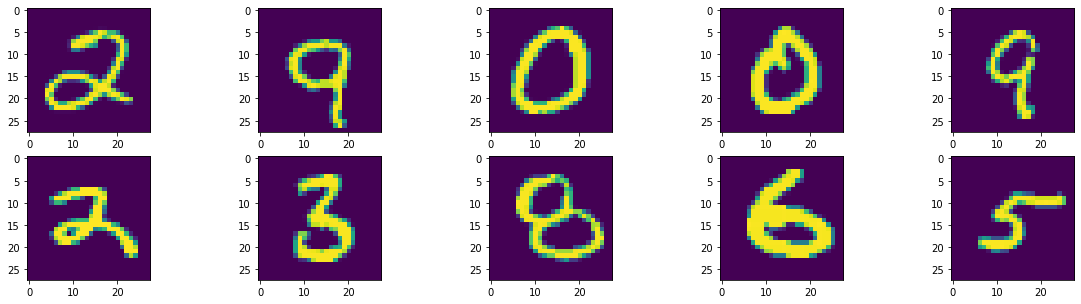

In [6]:
# random image plotting from testing image set

plt.figure(figsize=(20,5))

for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(x_test[random.randint(1,10000)].reshape(28,28))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 11, 11, 32)       113       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 4, 4, 64)         2912      
 leConv2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 256)         147712    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 256)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                        

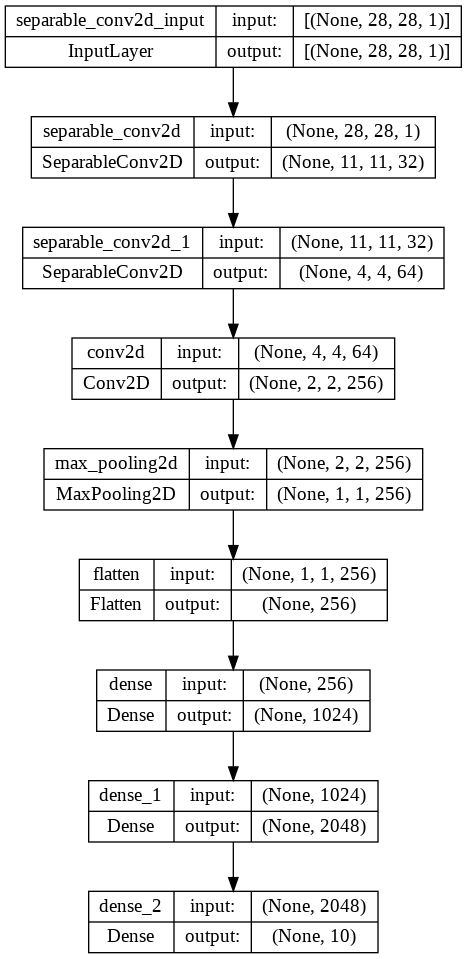

In [7]:
# Model with Depth-wise seperable CNN

model = tf.keras.Sequential()
## Feature Extraction is Done here
# Seperable Convolutional Layers
model.add(layers.SeparableConv2D(32, (7,7), input_shape = (28,28,1), strides = 2, activation = 'relu'))
model.add(layers.SeparableConv2D(64, (5,5), strides = 2, activation = 'relu'))

# Adding a Conventional Convolutional Layer
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
# Adding a MaxPooling layer for downsampling
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'))

# Flattening the feature maps
model.add(layers.Flatten())
# Feed it to Fully Connected Layers
# Classification is Done here
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()
tf.keras.utils.plot_model(model, show_shapes = True)

In [8]:
# Compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [9]:
# introducing callback if there is no improvement in training after 3 epochs
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

In [10]:
# training the model
history = model.fit(x_train, y_train, epochs = 20, batch_size = 256, callbacks = [callback], verbose = 1 ,validation_data = (x_test, y_test))

Epoch 1/20
235/235 [==============================] - 8s 12ms/step - loss: 0.5213 - accuracy: 0.8344 - val_loss: 0.1519 - val_accuracy: 0.9538
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1209 - accuracy: 0.9617 - val_loss: 0.0824 - val_accuracy: 0.9747
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0854 - accuracy: 0.9730 - val_loss: 0.0699 - val_accuracy: 0.9786
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0609 - accuracy: 0.9810 - val_loss: 0.0668 - val_accuracy: 0.9790
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0641 - val_accuracy: 0.9799
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0391 - accuracy: 0.9872 - val_loss: 0.0703 - val_accuracy: 0.9797
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0638 - val_accuracy: 0.9802
Epoch

In [11]:
# model performance
loss, acc = model.evaluate(x_test, y_test)
print (f"Test Accuracy is : {(acc * 100):.2f} %")

313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9844
Test Accuracy is : 98.44 %


Shape of Original Image is : (584, 752, 3)


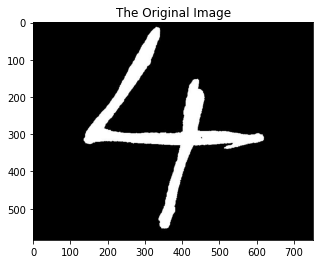

In [12]:
# read an image input
img = cv2.imread("imageTest.jpg")
plt.imshow(img)
plt.title("The Original Image")
print (f"Shape of Original Image is : {img.shape}")

The shape of gray scale image is (584, 752)
Shape of Resized IMage is : (28, 28)


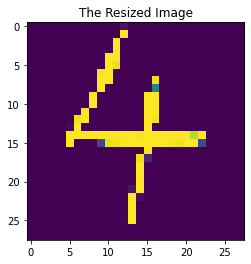

In [13]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print (f"The shape of gray scale image is {img.shape}")
# resize the image
img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)
plt.imshow(img); plt.title ("The Resized Image")
print (f"Shape of Resized IMage is : {img.shape}")

In [14]:
# normalizing the image
img = img / 255

In [15]:
img = tf.expand_dims(img, 0)  # Create batch axis
print (f"Shape of img is : {img.shape}")

Shape of img is : (1, 28, 28)


In [16]:
# categories
CATEGORIES = ['0','1','2','3','4','5','6','7','8','9']

# making prediction
prediction = model.predict(img)
print (prediction[0])
print(prediction[0].argmax())

1/1 [==============================] - 0s 153ms/step
[2.9261654e-14 2.7646618e-11 3.8510281e-13 6.4786654e-16 1.0000000e+00
 1.6202435e-11 2.8714670e-11 3.4674548e-09 7.1124040e-10 3.3884540e-10]
4


In [17]:
pred_name = CATEGORIES[np.argmax(prediction)]
print (f"type of pred_name is : {type(pred_name)}")
print(f"The predicted class is : {pred_name}")

type of pred_name is : <class 'str'>
The predicted class is : 4


# THE END